**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
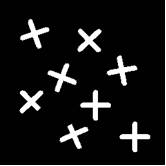
art8lab1.png: 
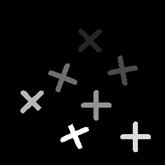
art8lab2.png: 
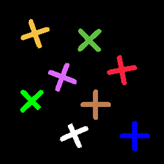
		

Componente: 0 qtd: 60281
Componente: 1 qtd: 667
Componente: 2 qtd: 672
Componente: 3 qtd: 669
Componente: 4 qtd: 670
Componente: 5 qtd: 1
 Olha q filha da puta esse 1 pixel
Componente: 6 qtd: 670
Componente: 7 qtd: 618
Componente: 8 qtd: 670
Componente: 9 qtd: 618


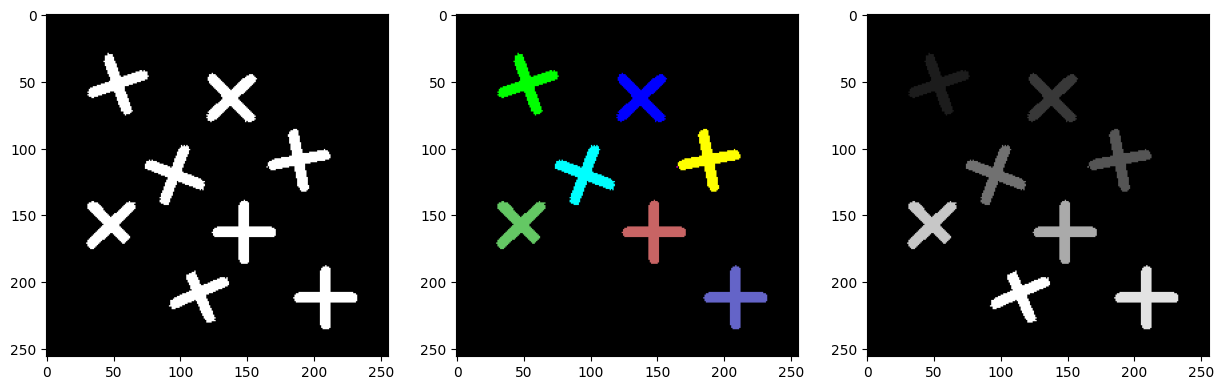

In [50]:
# code here
# type your code here
# Python code to read image

#Resolucao usando BFS
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)


vizinhaca4 = [(0, 1), (1, 0), (0, -1), (-1, 0)]
vizinhaca8 = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]

def rotula_componentes_conexos(img, vizinhanca):
    altura, largura = img.shape
    rotulos = np.zeros_like(img) 
    proximo_rotulo = 1

    for i in range(1,altura):
        for j in range(1,largura):
            if img[i, j] == 255 and rotulos[i, j] == 0:
                fila = [(i, j)]
                rotulos[i, j] = proximo_rotulo
                while fila:
                    x, y = fila.pop(0)
                    for dx, dy in vizinhanca:
                        nx, ny = x + dx, y + dy
                        if img[nx, ny] == 255 and rotulos[nx, ny] == 0:
                            rotulos[nx, ny] = proximo_rotulo
                            fila.append((nx, ny))
                proximo_rotulo += 1
    return rotulos

img_rotulada = rotula_componentes_conexos(img, vizinhaca4)
labels, counts = np.unique(img_rotulada, return_counts=True)
for componente, quantidade in zip(labels, counts):
    print(f"Componente: {componente} qtd: {quantidade}")
    if quantidade == 1:
        print(f" Olha q filha da puta esse 1 pixel")
        

colored_img = np.zeros((img_rotulada.shape[0], img_rotulada.shape[1], 3), dtype=np.uint8)
colors = [
    [0, 0, 0],   
    [0, 255, 0],  
    [0, 0, 255],   
    [255, 255, 0], 
    [0, 255, 255], 
    [255, 0, 255],
    [200,100,100],
    [100,200,100],
    [100,100,200],
]
for idx, label in enumerate(np.unique(img_rotulada)):
    colored_img[img_rotulada == label] = colors[idx % len(colors)]


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(colored_img)
plt.subplot(1, 3, 3)
plt.imshow(img_rotulada, cmap='gray')
plt.show()



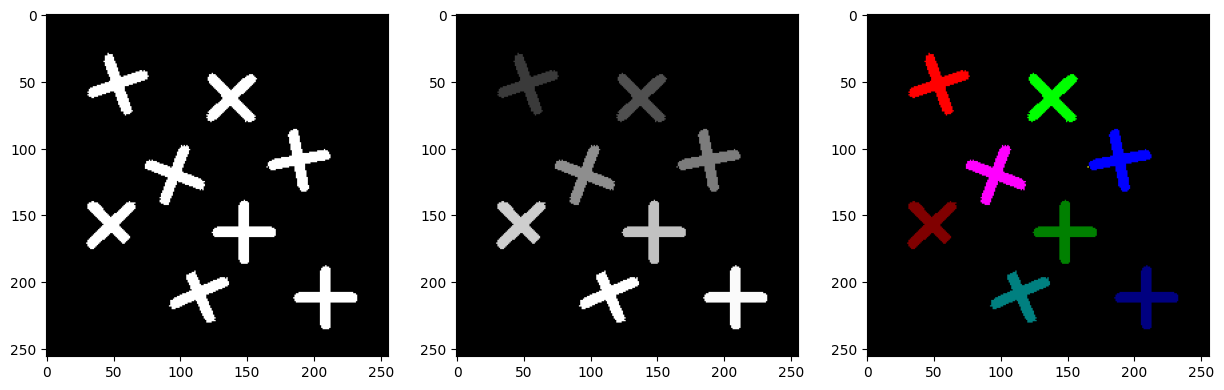

In [3]:
#Resolucao usando algoritmo para rotular componentes conexos
import cv2
import matplotlib.pyplot as plt
import numpy as np

# A vizinhanca considerada sera vizinhanca 4
img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)
type(img)
imgRotulada = img.copy()

rows = len(img)
cols = len(img[0])
rotulo = 1
labels = []

# primeira varrida:
for i in range(1, rows, 1):
    for j in range(1, cols, 1):
        p = img[i][j]
        if p == 255:
            t = img[i-1][j]
            l = img[i][j-1]
            rotuloT = imgRotulada[i-1][j]
            rotuloL = imgRotulada[i][j-1]
            if t == 1 and l == 1:
                rotulo += 1
                imgRotulada[i][j] = rotulo
            elif t == 1 and l == 255:
                imgRotulada[i][j] = rotuloL
            elif t == 255 and l == 1:
                imgRotulada[i][j] = rotuloT
            else:
                if rotuloT == rotuloL:
                    imgRotulada[i][j] = rotuloL
                else:
                    imgRotulada[i][j] = rotuloL
                    labels.append((rotuloL,rotuloT))

# segunda varrida:
for rotuloL, rotuloT in labels:
    print(imgRotulada[imgRotulada == rotuloT])
    imgRotulada[imgRotulada == rotuloT] = rotuloL

# gerando imagem colorida
imgColorida = np.zeros((imgRotulada.shape[0], imgRotulada.shape[1], 3), dtype=np.uint8)
colors = [[0,0,0], [255,0,0], [0,255,0], [0,0,255], [255,255,0], [255,0,255], [0,128,0], [128,0,0], [0,0,128], [0,128,128], [255,255,255]]
for idx, label in enumerate(np.unique(imgRotulada)):
    imgColorida[imgRotulada == label] = colors[idx % len(colors)]
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,3,2)
plt.imshow(imgRotulada, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(imgColorida)

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


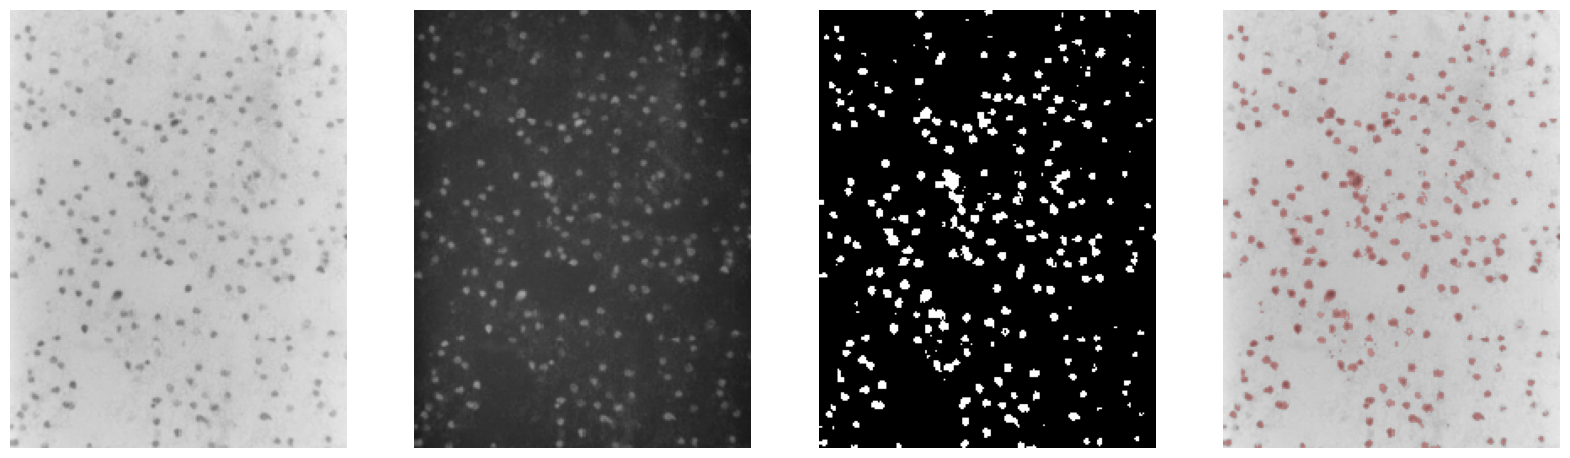

there are 263 different objects


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

img = cv2.imread("clc3.png")
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE))

og_img = img
width = img.shape[0]
height = img.shape[1]
threshold = 75

inverted_img = 255 - img
img = inverted_img

plt.subplot(1,4,2)
plt.axis("off")
plt.imshow(img, cmap='gray')
#thresholding
for i in range(width):
    for j in range(height):
        if img[i, j][0] < threshold:
            img[i, j] = 0
        else:
            img[i, j] = 255

plt.subplot(1,4,3)
plt.axis("off")
plt.imshow(img, cmap='gray')

#treating the image for ploting
img_transparent = img.copy()

black_mask = np.all(img_transparent == [0, 0, 0], axis=-1)
img_transparent = cv2.cvtColor(img_transparent, cv2.COLOR_BGR2BGRA)
img_transparent[black_mask, 3] = 0
img_transparent = img_transparent * (255,0,0,1) #making it red


plt.subplot(1, 4, 4)
plt.axis("off")
plt.imshow(og_img, alpha=1)
plt.imshow(img_transparent, alpha=0.2)
plt.show()

visited = np.zeros((width, height), dtype=bool)

def search_neighbours(i, j):
    stack = [(i, j)]
    connected_pixels = []
    while stack:
        x, y = stack.pop()
        if visited[x, y] or np.all(img[x, y] <= 5):
            continue
        visited[x, y] = True
        connected_pixels.append((x, y))
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: #checking neighbours
            nx, ny = x + dx, y + dy
            if 0 <= nx < width and 0 <= ny < height and not visited[nx, ny] and np.all(img[nx, ny] > 5): #checking for not visited avaible neighbours
                stack.append((nx, ny))
    return connected_pixels

all_groups = []
for i in range(width):
    for j in range(height):
        if not visited[i, j] and np.all(img[i, j] > 5):
            connected_group = search_neighbours(i, j)
            if connected_group:
                all_groups.append(connected_group)


print(f"there are {len(all_groups)} different objects")